In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import math
import tensorflow as tf
import numpy as np
from numpy import unique
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, TensorBoard

In [2]:
data = pd.read_csv(r"C:\Users\49173\Desktop\Data\stockxf2.csv")
df = data.copy()

In [3]:
df

,productId,orderDate,salePrice,shoeSize,brand,sneakerName,colorway,retailPrice,releaseDate,salesThisPeriod,hype,days,collaboration
0,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.5,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
1,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
2,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,382,10.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
3,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,304,8.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
4,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,390,12.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,384,10.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192881,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,366,12.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192882,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,420,10.5,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192883,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,357,11.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1


In [4]:
# df['log_hype'] = np.log(df['hype']+1)
df['log_resalePrice'] = np.log(df['salePrice'])

In [5]:
df = df.drop(['productId', 
              'orderDate',
              'sneakerName',
              'colorway', 
              'releaseDate', 
              "hype", 
              'salePrice'],
              axis = 1)

In [6]:
df

,shoeSize,brand,retailPrice,salesThisPeriod,days,collaboration,log_resalePrice
0,9.5,Jordan,210,2476,5,1,5.703782
1,9.0,Jordan,210,2476,5,1,5.703782
2,10.0,Jordan,210,2476,5,1,5.945421
3,8.0,Jordan,210,2476,5,1,5.717028
4,12.0,Jordan,210,2476,5,1,5.966147
...,...,...,...,...,...,...,...
192880,10.0,adidas,220,13,1211,1,5.950643
192881,12.0,adidas,220,13,1211,1,5.902633
192882,10.5,adidas,220,13,1211,1,6.040255
192883,11.0,adidas,220,13,1211,1,5.877736


In [7]:
df2 = pd.get_dummies(df["brand"], prefix='brand')

In [8]:
df = df.drop(['brand'], axis = 1)

In [9]:
# df3 = pd.get_dummies(df["sneakerName"], prefix='SN')

In [10]:
# df = df.drop(['sneakerName'], axis = 1)

In [11]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_resalePrice
0,9.5,210,2476,5,1,5.703782
1,9.0,210,2476,5,1,5.703782
2,10.0,210,2476,5,1,5.945421
3,8.0,210,2476,5,1,5.717028
4,12.0,210,2476,5,1,5.966147
...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,5.950643
192881,12.0,220,13,1211,1,5.902633
192882,10.5,220,13,1211,1,6.040255
192883,11.0,220,13,1211,1,5.877736


In [12]:
df = df.join(df2)

In [13]:
# df = df.join(df3)

In [14]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_resalePrice,brand_Alexander McQueen,brand_BAPE,brand_Common Projects,brand_Converse,...,brand_Jordan,brand_MSCHF,brand_New Balance,brand_Nike,brand_Puma,brand_Reebok,brand_Salomon,brand_Under Armour,brand_Vans,brand_adidas
0,9.5,210,2476,5,1,5.703782,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,9.0,210,2476,5,1,5.703782,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,10.0,210,2476,5,1,5.945421,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8.0,210,2476,5,1,5.717028,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,12.0,210,2476,5,1,5.966147,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,5.950643,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192881,12.0,220,13,1211,1,5.902633,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192882,10.5,220,13,1211,1,6.040255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192883,11.0,220,13,1211,1,5.877736,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
dfnames = df.copy()
dfnames = dfnames.drop(['log_resalePrice'], axis = 1)

columns = dfnames.columns.tolist()
columns.insert(0, 'constant')
print(columns)

['constant', 'shoeSize', 'retailPrice', 'salesThisPeriod', 'days', 'collaboration', 'brand_Alexander McQueen', 'brand_BAPE', 'brand_Common Projects', 'brand_Converse', 'brand_Crocs', 'brand_Jordan', 'brand_MSCHF', 'brand_New Balance', 'brand_Nike', 'brand_Puma', 'brand_Reebok', 'brand_Salomon', 'brand_Under Armour', 'brand_Vans', 'brand_adidas']


In [16]:
X = df.drop('log_resalePrice',axis =1).values
y = df['log_resalePrice'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\49173\AppData\Local\Temp\ipykernel_21756\2855883272.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\49173\AppData\Local\Temp\ipykernel_21756\2855883272.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [18]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
# having 9 neurons is based on the number of available features
model = Sequential()
model.add(Dense(9,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

model.summary()

Epoch 1/400
1055/1055 [==============================] - 9s 3ms/step - loss: 2.0089 - val_loss: 0.1462
Epoch 2/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1335 - val_loss: 0.1284
Epoch 3/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1245 - val_loss: 0.1241
Epoch 4/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1192 - val_loss: 0.1202
Epoch 5/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1136 - val_loss: 0.1141
Epoch 6/400
1055/1055 [==============================] - 4s 4ms/step - loss: 0.1104 - val_loss: 0.1099
Epoch 7/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1077 - val_loss: 0.1086
Epoch 8/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1051 - val_loss: 0.1051
Epoch 9/400
1055/1055 [==============================] - 3s 3ms/step - loss: 0.1035 - val_loss: 0.1029
Epoch 10/400
1055/1055 [==============================] - 3s 3ms/step - l

MAE: 0.1825113728085573
MSE: 0.06048555962023627
RMSE: 0.24593812152701394
VarScore: 0.7340551777356594


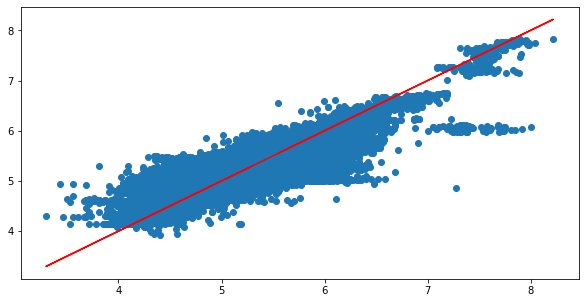

In [21]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [22]:
y_pred_2 = []
for pred in y_pred:
  y_pred_2.append(pred[0])

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
df1 = df.head(20)
df1

,Actual,Predicted
0,5.560682,5.868451
1,5.886104,5.959053
2,4.700480,4.987914
3,5.645447,5.475070
4,4.356709,4.509443
5,4.394449,4.530380
6,5.545177,5.606577
7,4.919981,4.994384
8,5.298317,5.631250
9,5.337538,5.424427
